# Star Hotels Project

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Import required Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



In [2]:
# Load Data
ReservData = pd.read_csv("StarHotelsGroup.csv")
# Make Copy of data as backup
dataBackup = ReservData.copy()

In [3]:
# Check structure of data
ReservData.shape

(56926, 18)

In [4]:
# Check data structure
ReservData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

In [5]:
#Check for null values
ReservData.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<AxesSubplot:>

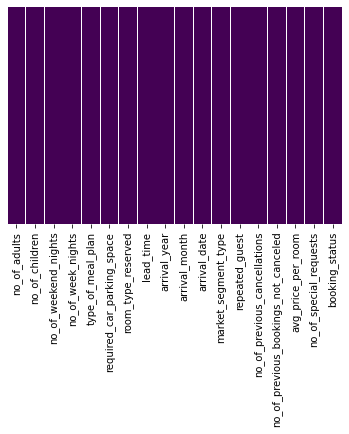

In [6]:
# Above method doesn't show for all data, this chart might help
sns.heatmap(ReservData.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [7]:
# Check Sample data to have feel of the data
np.random.seed(1)
ReservData.sample(n=10) # Sample Data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
10043,1,0,0,2,Not Selected,0,Room_Type 1,37,2018,10,27,Online,0,0,0,109.00,1,Not_Canceled
39715,2,1,2,3,Meal Plan 1,0,Room_Type 1,104,2019,4,6,Online,0,0,0,101.15,0,Not_Canceled
30095,2,0,0,1,Not Selected,0,Room_Type 1,20,2019,4,20,Online,0,0,0,115.00,0,Not_Canceled
11327,1,0,2,2,Meal Plan 1,0,Room_Type 1,162,2018,10,14,Online,0,0,0,115.00,0,Canceled
45593,1,0,2,6,Meal Plan 1,0,Room_Type 1,115,2018,2,27,Offline,0,0,0,64.75,0,Canceled
19258,1,0,2,1,Meal Plan 1,0,Room_Type 5,2,2019,5,7,Aviation,1,0,1,125.00,0,Not_Canceled
5654,2,0,1,1,Meal Plan 1,0,Room_Type 1,0,2017,9,21,Corporate,0,0,0,65.00,0,Not_Canceled
15474,2,1,1,3,Meal Plan 1,0,Room_Type 1,57,2018,8,15,Online,0,0,0,152.10,0,Not_Canceled
16553,3,0,0,2,Meal Plan 1,0,Room_Type 4,73,2018,9,6,Online,0,0,0,168.30,2,Not_Canceled
17911,2,0,0,2,Meal Plan 1,0,Room_Type 4,6,2017,12,31,Online,0,0,0,137.00,1,Not_Canceled


In [8]:
# count of all variavle data types
ReservData.dtypes.value_counts()

int64      13
object      4
float64     1
dtype: int64

In [9]:
# duplicate values check
ReservData.duplicated().sum()

14350

In [10]:
# check for number of unique values in the variables
ReservData.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       9
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                397
arrival_year                               3
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      73
avg_price_per_room                      4939
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [11]:
# Lets drop duplicate data as it is not going to add any value
ReservData.drop_duplicates(inplace=True)

In [12]:
# Convert Categorical values
ReservData['type_of_meal_plan'] = ReservData.type_of_meal_plan.astype('category')
ReservData['room_type_reserved'] = ReservData.room_type_reserved.astype('category')
ReservData['market_segment_type'] = ReservData.market_segment_type.astype('category')
ReservData['booking_status'] = ReservData.booking_status.astype('category')

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [13]:
ReservData.describe(exclude='number')# TO check for non-numerical attributes

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,42576,42576,42576,42576
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,31863,29730,34169,28089


In [14]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

ReservData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,42576.00,NaN,NaN,NaN,1.92,0.53,0.00,2.00,2.00,2.00,4.00
no_of_children,42576.00,NaN,NaN,NaN,0.14,0.46,0.00,0.00,0.00,0.00,10.00
no_of_weekend_nights,42576.00,NaN,NaN,NaN,0.90,0.89,0.00,0.00,1.00,2.00,8.00
no_of_week_nights,42576.00,NaN,NaN,NaN,2.32,1.52,0.00,1.00,2.00,3.00,17.00
type_of_meal_plan,42576,4,Meal Plan 1,31863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,42576.00,NaN,NaN,NaN,0.03,0.18,0.00,0.00,0.00,0.00,1.00
room_type_reserved,42576,7,Room_Type 1,29730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,42576.00,NaN,NaN,NaN,77.32,77.28,0.00,16.00,53.00,118.00,521.00
arrival_year,42576.00,NaN,NaN,NaN,2018.30,0.63,2017.00,2018.00,2018.00,2019.00,2019.00
arrival_month,42576.00,NaN,NaN,NaN,6.37,3.05,1.00,4.00,6.00,9.00,12.00


In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="rainbow"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

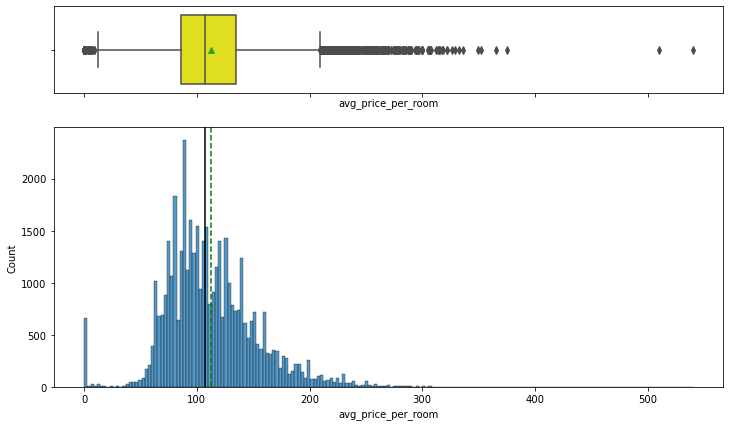

In [16]:
histogram_boxplot(ReservData, "avg_price_per_room")

Lot of records are with value 0, since Room price can't be 0 lets do analysis to find out

In [17]:
ReservData.loc[ReservData["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    457
Online           184
Aviation           0
Corporate          0
Offline            0
Name: market_segment_type, dtype: int64

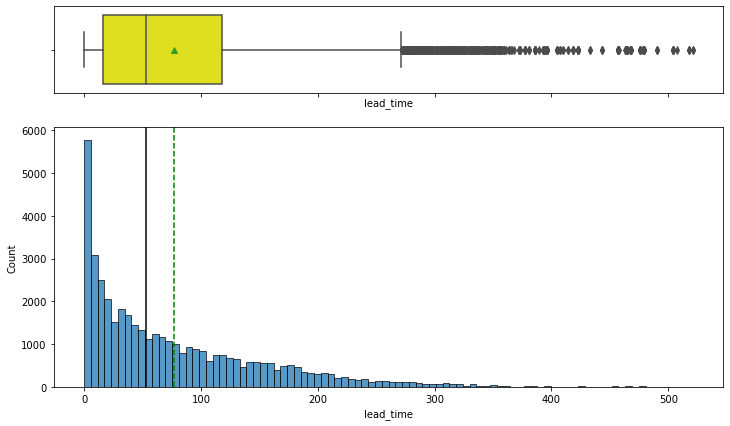

In [18]:
histogram_boxplot(ReservData, "lead_time")

Distribution is right skewed and w ecan see lot of outliers with value up to 500.

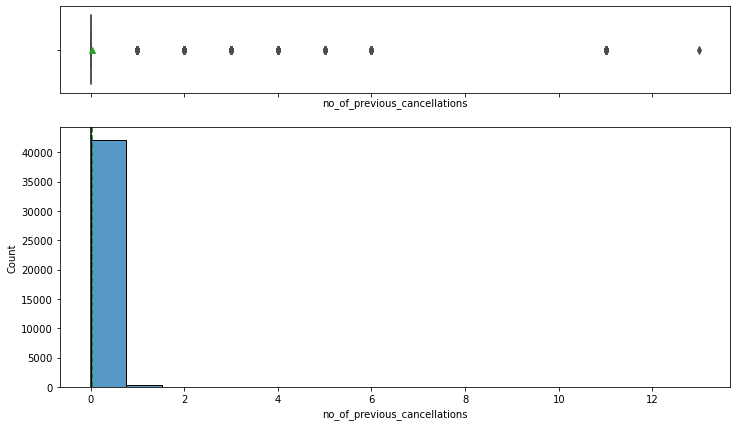

In [19]:
histogram_boxplot(ReservData, "no_of_previous_cancellations")

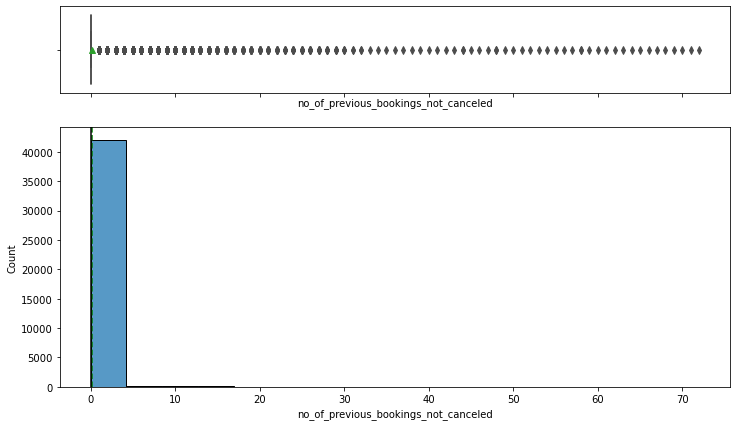

In [20]:
histogram_boxplot(ReservData, "no_of_previous_bookings_not_canceled")

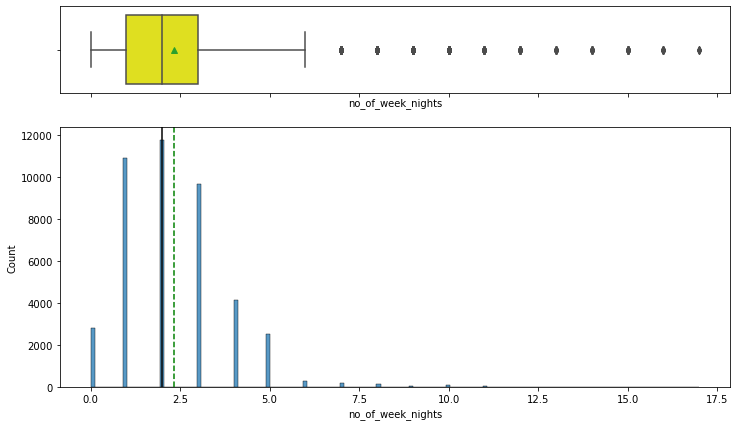

In [21]:
histogram_boxplot(ReservData, "no_of_week_nights")

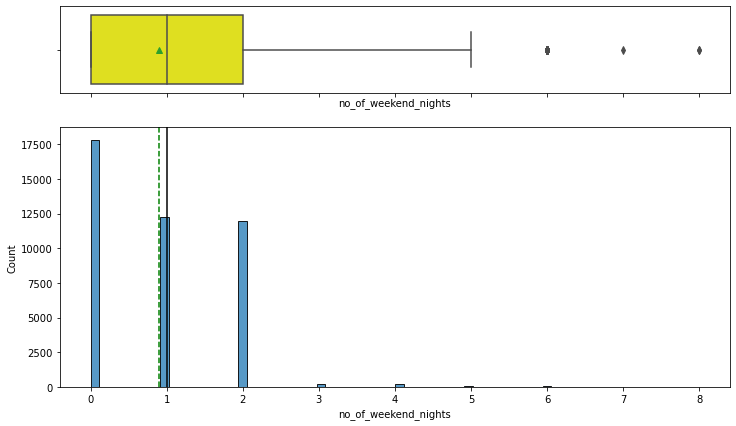

In [22]:
histogram_boxplot(ReservData, "no_of_weekend_nights")

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

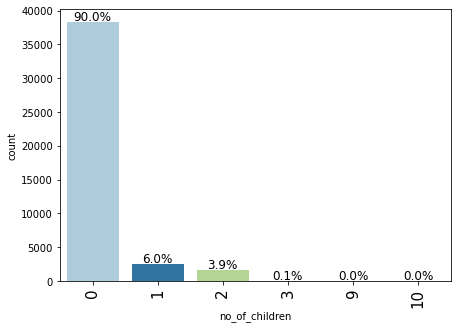

In [24]:
labeled_barplot(ReservData, "no_of_children", perc=True)

Lot of people have booking with no children in fact about 90%

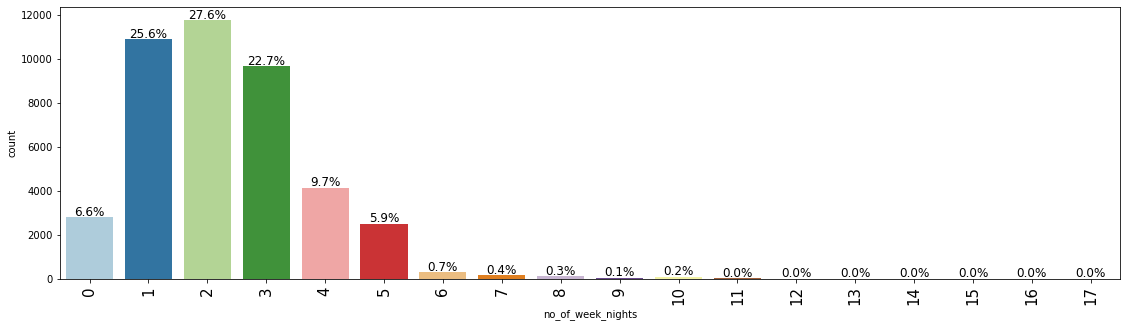

In [25]:
labeled_barplot(ReservData, "no_of_week_nights", perc=True)

Above data shows most of bookings are 1 or 2 or 3 nights. Some bookings have more than 10 nights

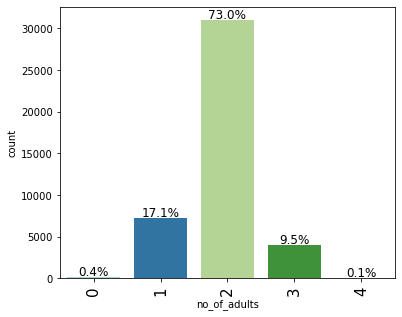

In [26]:
labeled_barplot(ReservData, "no_of_adults", perc=True)

Most of the bookings are for 2 people, may be couples

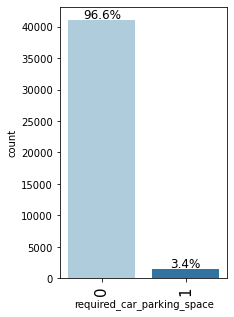

In [27]:
labeled_barplot(ReservData, "required_car_parking_space", perc=True)

Most of the customers doesn't require Car parking space

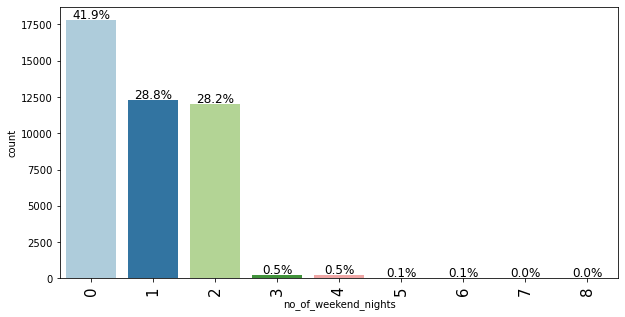

In [28]:
labeled_barplot(ReservData, "no_of_weekend_nights", perc=True)

most of bookings are non-weekend bookings.

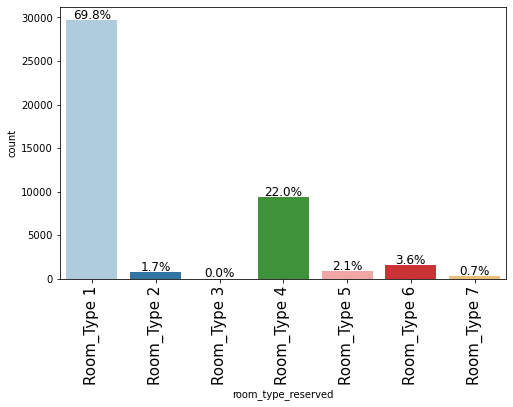

In [29]:
labeled_barplot(ReservData, "room_type_reserved", perc=True)

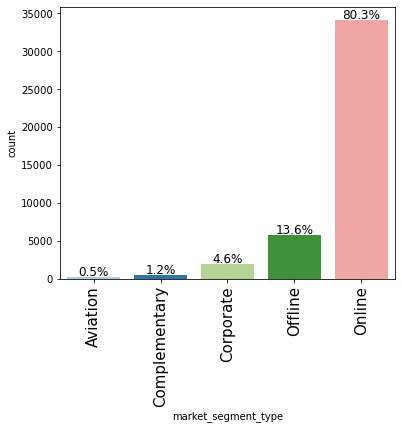

In [30]:
labeled_barplot(ReservData, "market_segment_type", perc=True)

most of bookings were mabe by online and 1.2% bookings ar ocmpliementary that answers data with room price for 0

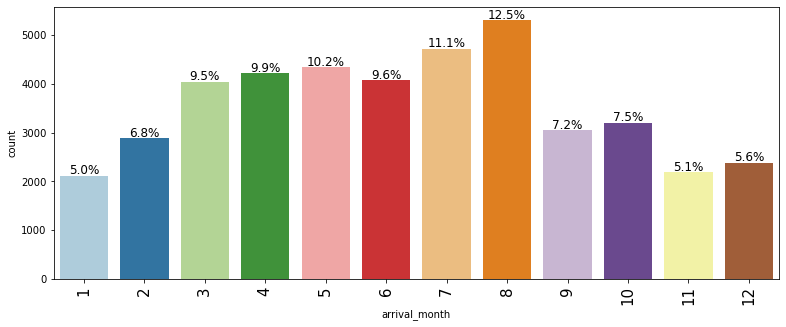

In [31]:
labeled_barplot(ReservData, "arrival_month", perc=True)

Above data shows Novemebr, December and January are non-busy months and August,May and July are most busiest months.

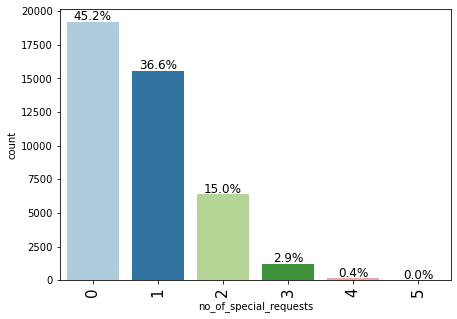

In [32]:
labeled_barplot(ReservData, "no_of_special_requests", perc=True)

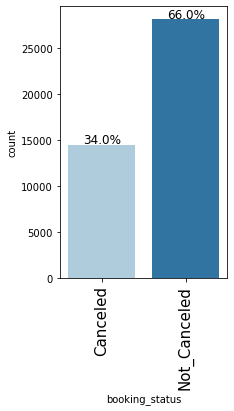

In [33]:
labeled_barplot(ReservData, "booking_status", perc=True)

In [34]:
# Encoding 
ReservData["booking_status"] = ReservData["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

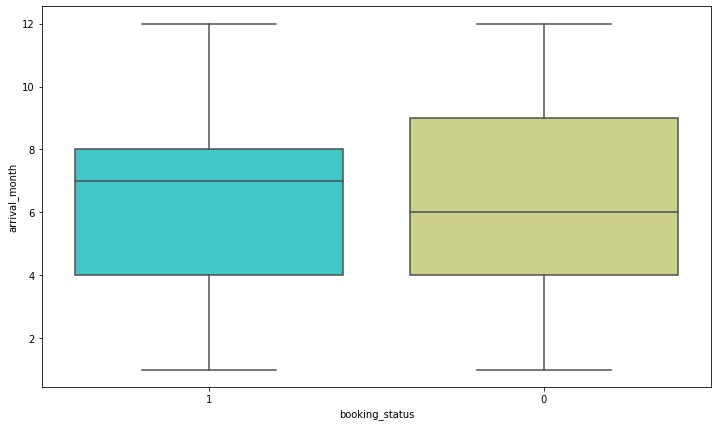

In [35]:
#BookingStatus vs arrival month
plt.figure(figsize=(12,7))
sns.boxplot(x='booking_status',y='arrival_month',data=ReservData,palette='rainbow')
plt.show()

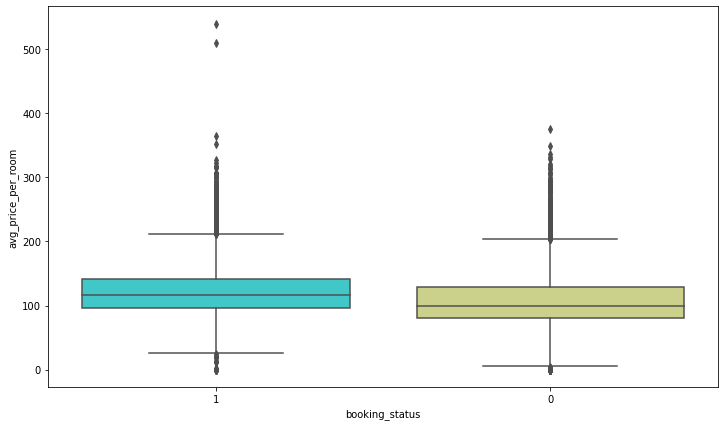

In [36]:
#BookingStatus vs arrival month
plt.figure(figsize=(12,7))
sns.boxplot(x='booking_status',y='avg_price_per_room',data=ReservData,palette='rainbow')
plt.show()

Text(0.5, 1.0, 'Average Price vs Booking status')

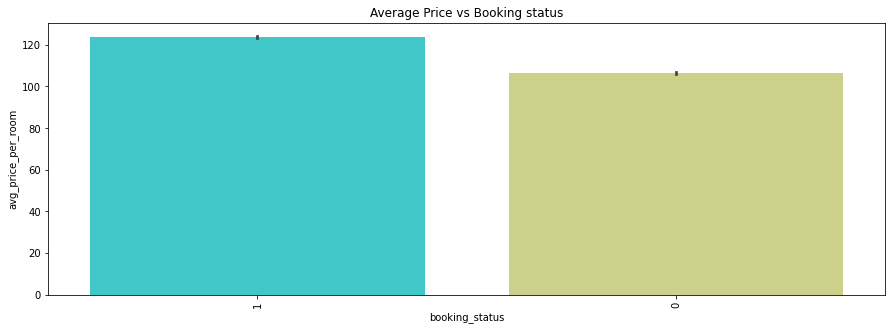

In [37]:
# Let's plot Bar plot against screen size across brands
plt.figure(figsize=(15, 5))
sns.barplot('booking_status', 'avg_price_per_room', data=ReservData, palette='rainbow');
plt.xticks(rotation=90);
plt.title('Average Price vs Booking status')

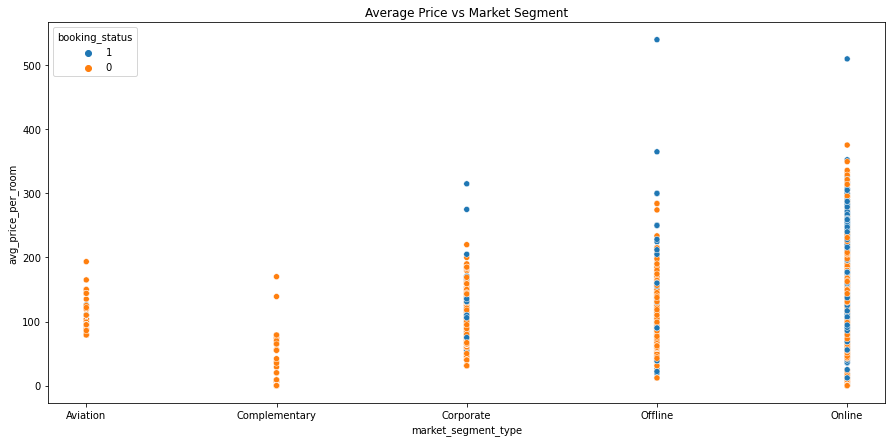

In [38]:
 # screen size vs battery
plt.figure(figsize=(15, 7))
sns.scatterplot(data=ReservData, y="avg_price_per_room", x="market_segment_type",hue='booking_status' )
plt.title("Average Price vs Market Segment");
plt.show()


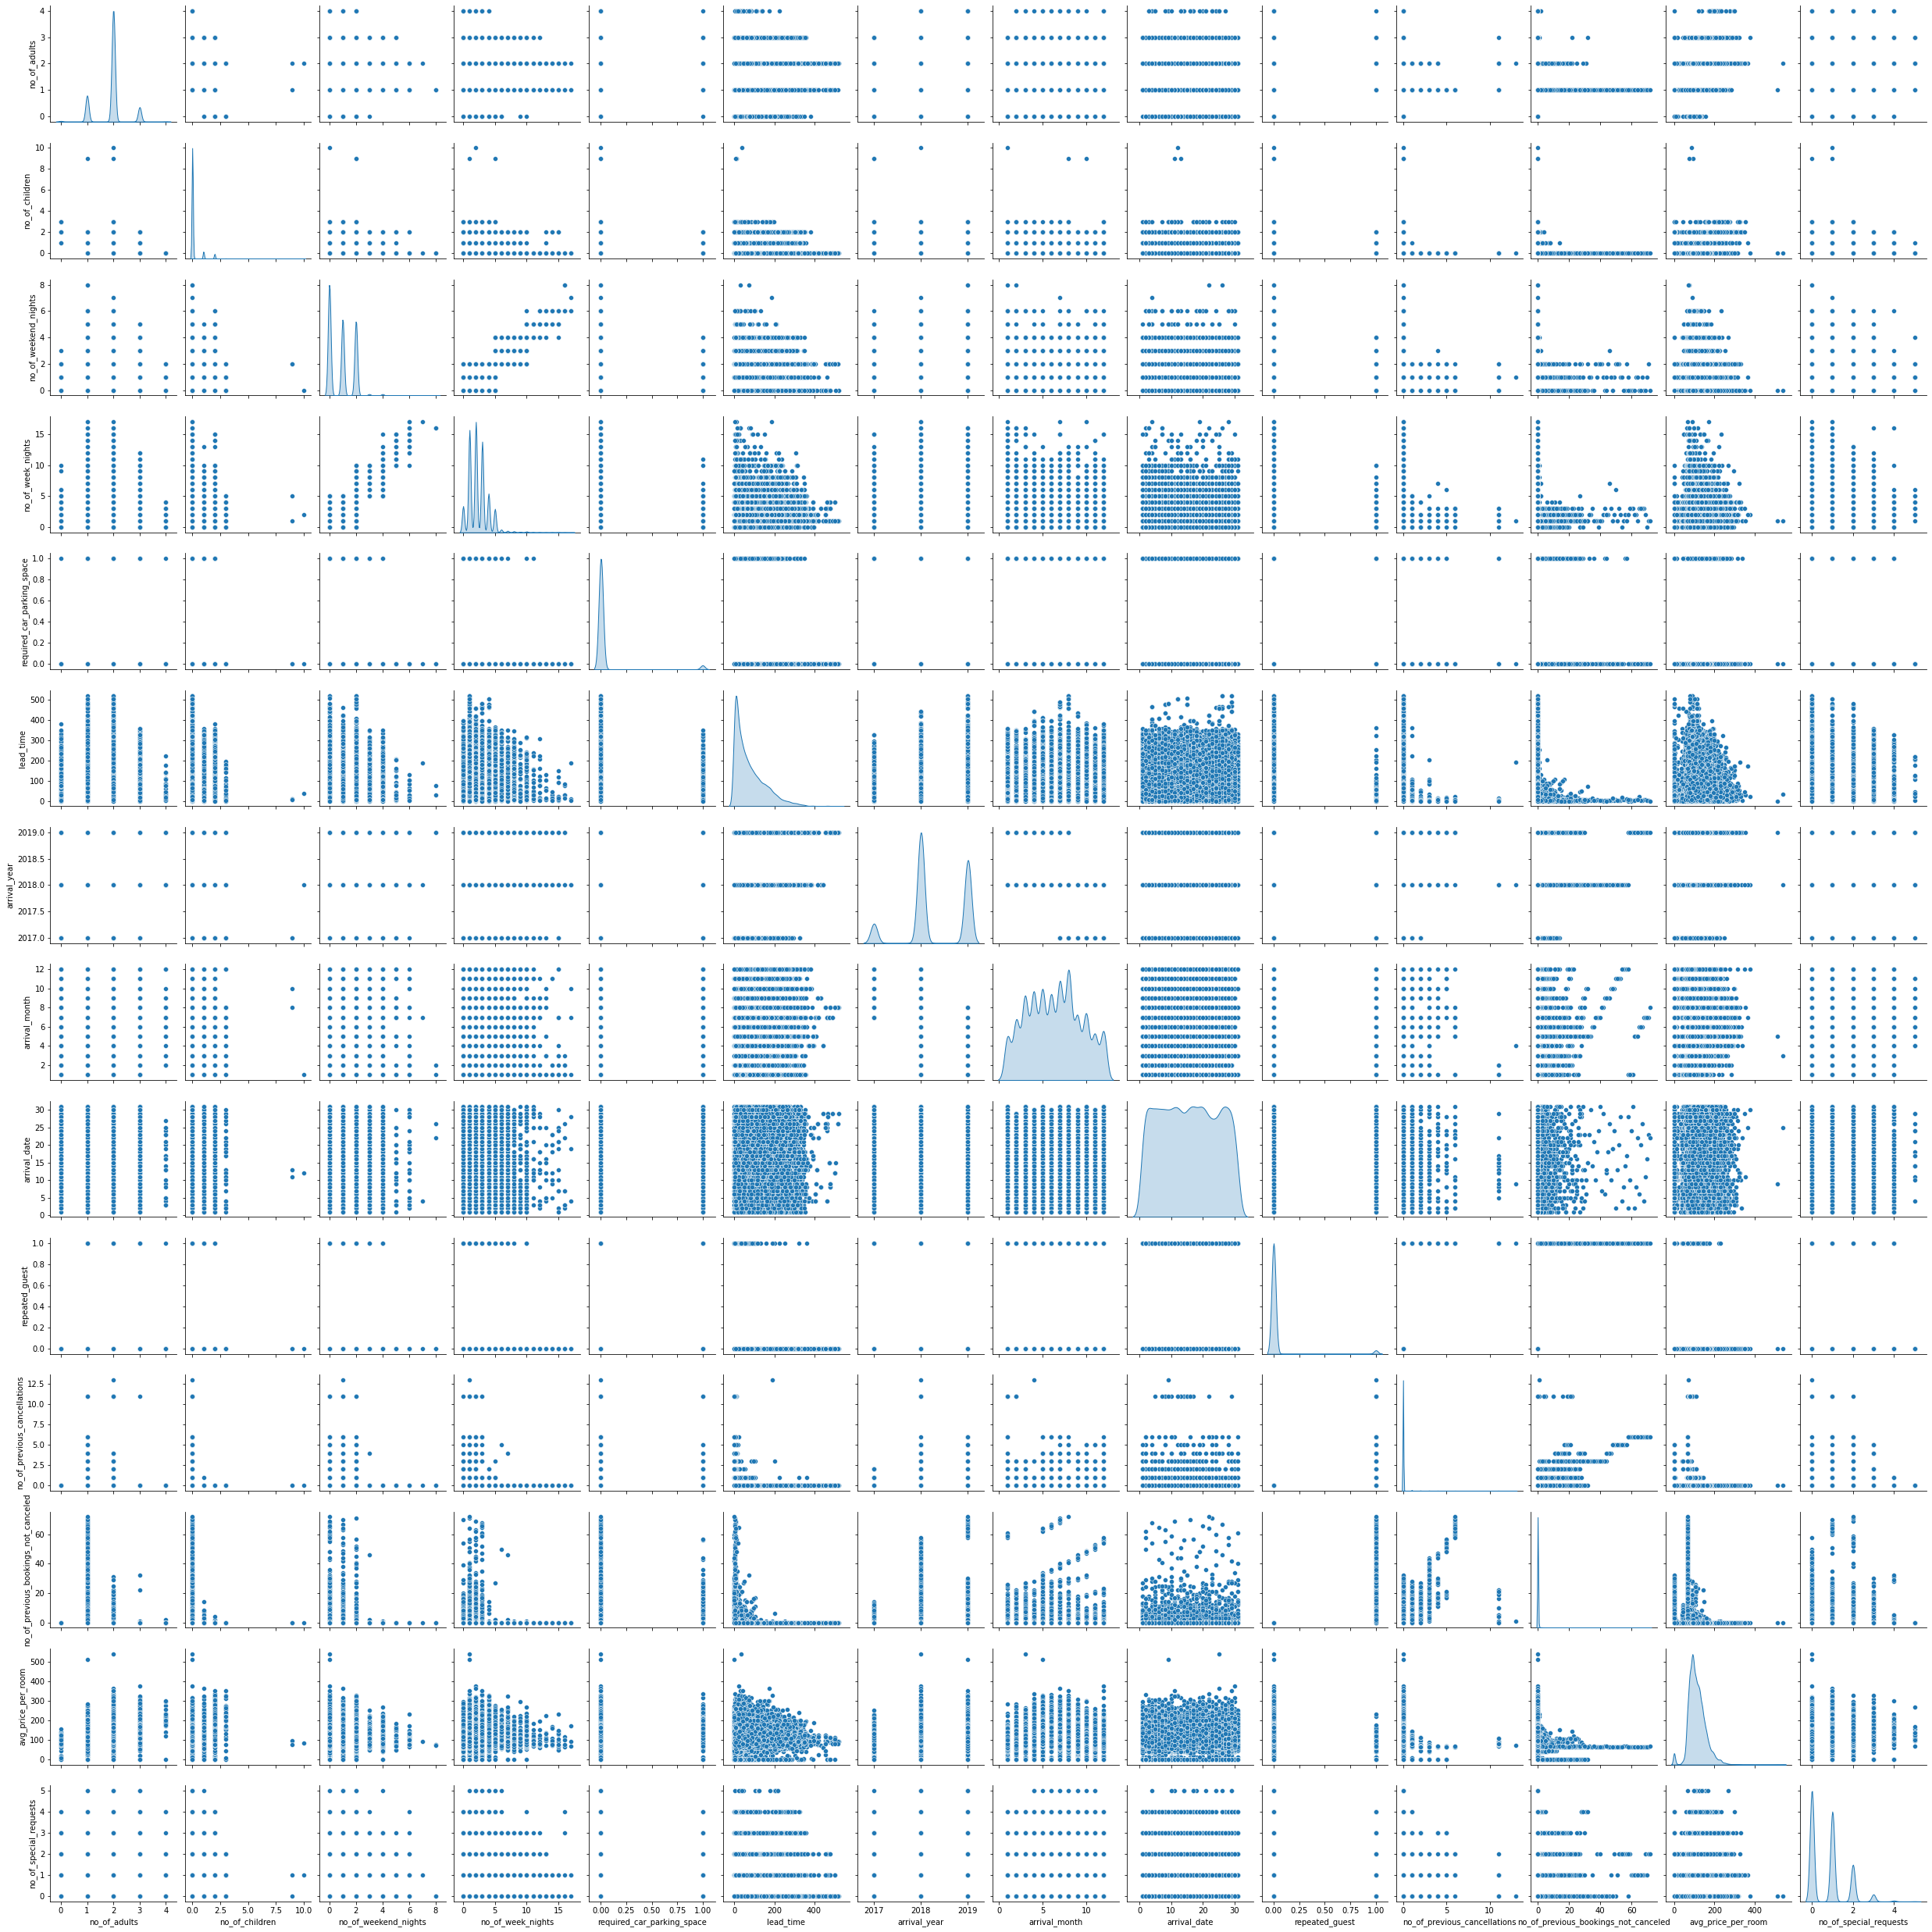

In [39]:
# pairplot of numeric variables
numeric_cols_list = ReservData.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(ReservData[numeric_cols_list], diag_kind='kde') 

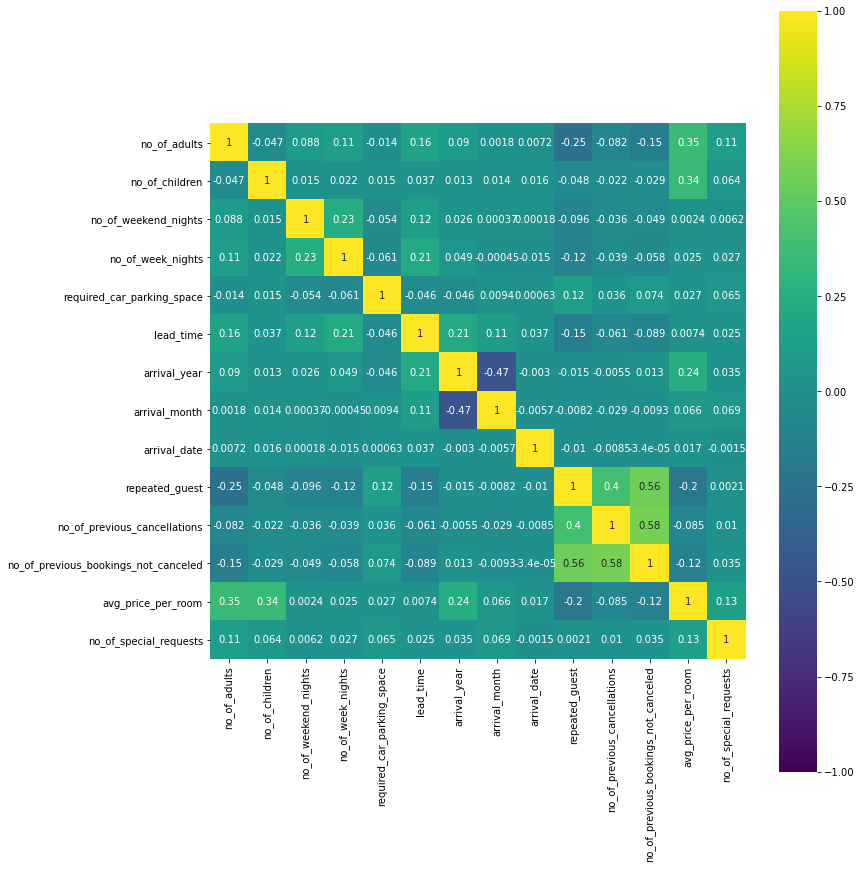

In [40]:
## To find Correlation is lets draw Correlation matrix
numberCols = ReservData.select_dtypes(include=np.number).columns.tolist()
# Bivariate analysis
ReservData_corr = ReservData.corr()

plt.figure(figsize=(12, 14))
sns.heatmap(ReservData_corr,cmap='viridis',vmax=1.0, vmin=-1.0,
            annot=True,square=True)
plt.show()

* Highest positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest.
* Negative correlation between the number of special requests from the customer and the booking status, indicating if a customer had some special requests there is chances of cancellation that may decrease
* Positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation

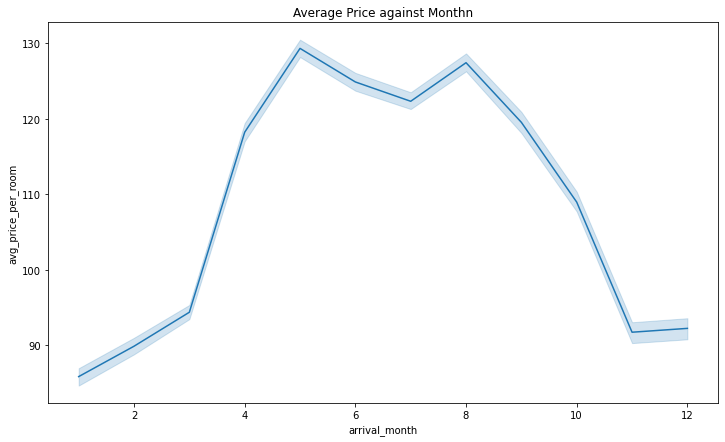

In [42]:
# Have line chart to compare variation of average price by arrival month
plt.figure(figsize=(12, 7))
sns.lineplot(x=ReservData['arrival_month'], y=ReservData["avg_price_per_room"]);
plt.title('Average Price against Monthn')
plt.show()

In [43]:
# Repated guest vs no of cancellations
repeatedData = ReservData[ReservData["repeated_guest"]>0];
repeatedData.groupby("booking_status")["repeated_guest"].count()

booking_status
1      10
0    1305
Name: repeated_guest, dtype: int64

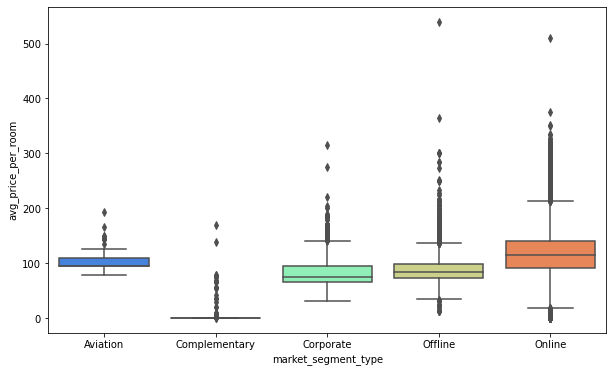

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ReservData, x="market_segment_type", y="avg_price_per_room", palette="rainbow"
)
plt.show()

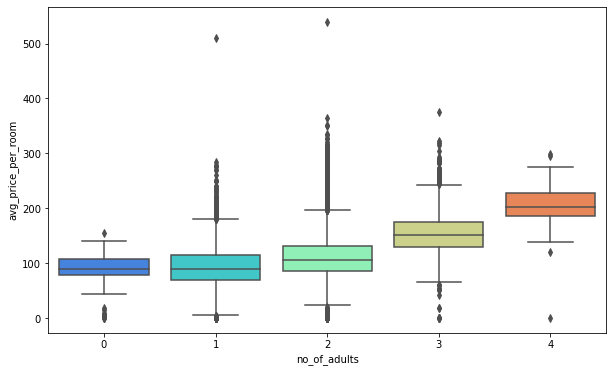

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ReservData, x="no_of_adults", y="avg_price_per_room", palette="rainbow"
)
plt.show()

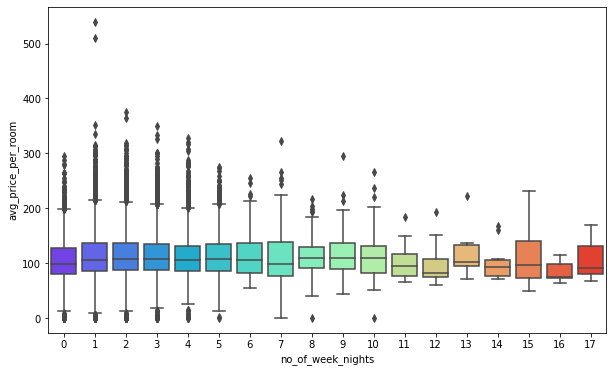

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ReservData, x="no_of_week_nights", y="avg_price_per_room", palette="rainbow"
)
plt.show()

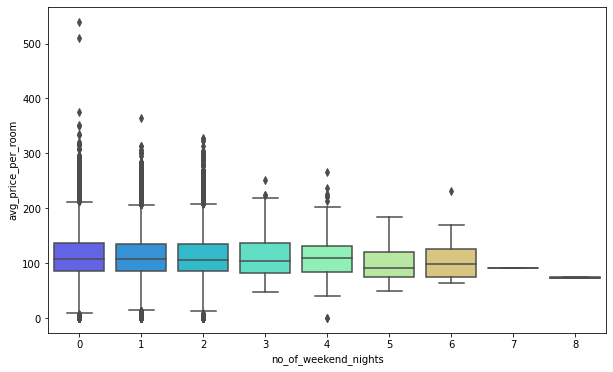

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ReservData, x="no_of_weekend_nights", y="avg_price_per_room", palette="rainbow"
)
plt.show()

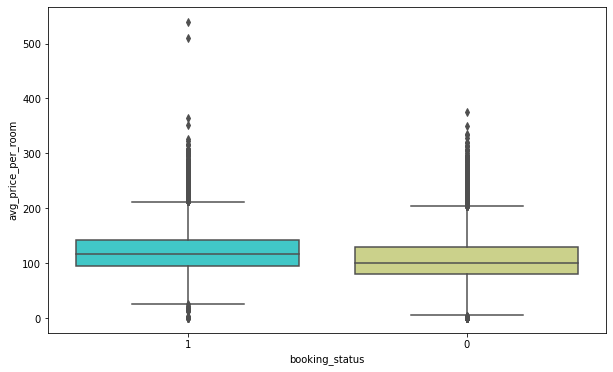

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ReservData, x="booking_status", y="avg_price_per_room", palette="rainbow"
)
plt.show()

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


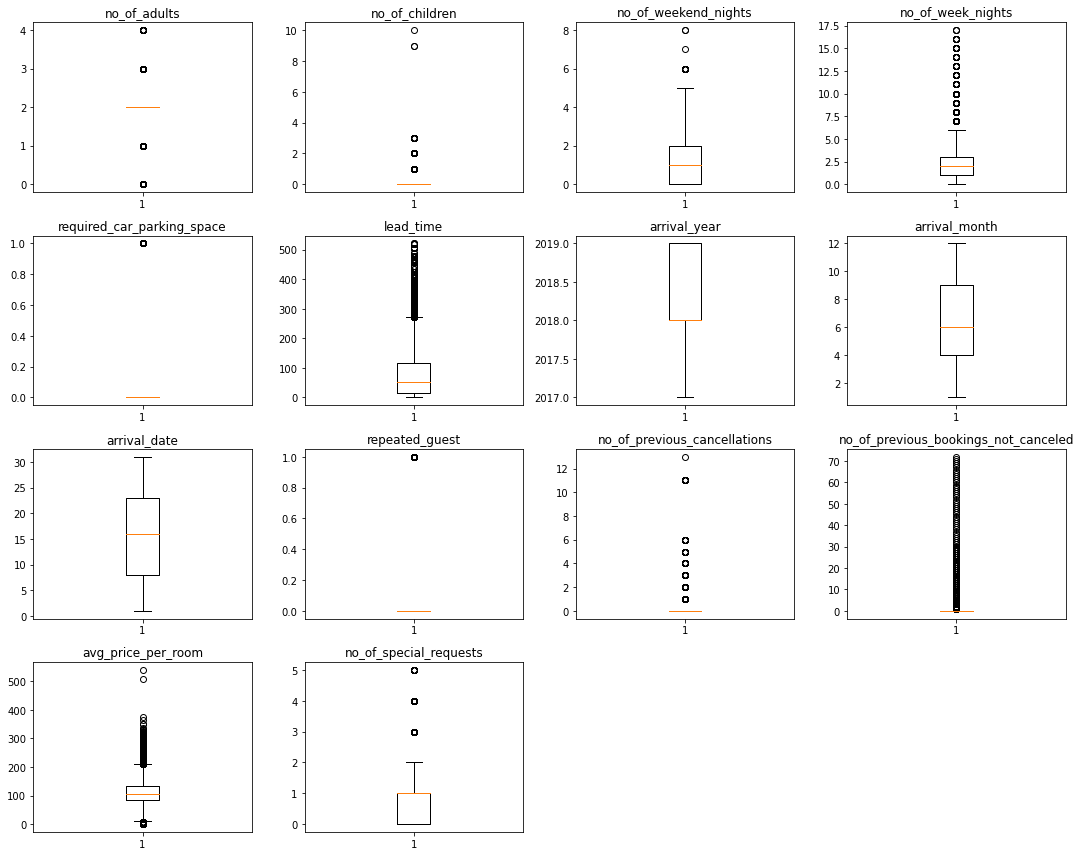

In [49]:
# outlier detection using boxplot
numericCols = ReservData.select_dtypes(include=np.number).columns.tolist()
print(numericCols)


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numericCols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(ReservData[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [50]:
# assigning the outliers for Average price the value of mean value
ReservData.loc[ReservData["avg_price_per_room"] >= 500, "avg_price_per_room"] = 112.38

## Modelling

### Data prep for modelling

In [51]:
X = ReservData.drop(["booking_status"], axis=1)
Y = ReservData["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
0   0.66
1   0.34
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.66
1   0.34
Name: booking_status, dtype: float64


In [53]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [54]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [55]:
# we will define a function to check VIF
def check_VIF(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Predications can be 
* Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
* Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

Here both is valuable, so going by F1 score (reduce FP and FN)

### Logistic Regression (sklearn)

In [58]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [59]:
# predicting on training set
y_pred_train = lg.predict(X_train)
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.7928732006844948
Precision: 0.7320415879017014
Recall: 0.6134046134046134
F1: 0.667492593590089


In [60]:
# predicting on the test set
y_pred_test = lg.predict(X_test)
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.790808737179989
Precision: 0.7355689939527212
Recall: 0.6101231190150479
F1: 0.666999002991027


* values are too close between test and train set, indicating model is good fit. One concern is High precision and Low recall.

### Logistic Regression (statsmodel)

In [61]:
X = ReservData.drop(["booking_status"], axis=1)
Y = ReservData["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [62]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.3292
Time:                        22:46:43   Log-Likelihood:                -12802.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   92.5203     68.732      1.346      0.178     -42.191     227.232
no_of_adults                            -0.0319      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
#TRaining Data Performance
model_performance_classification_statsmodels(lg, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.79,0.61,0.73,0.67


* Positive values for Coef column indicates the probablity of cancelling increase with the attribute value. Type of meal plan 3,No of prev cancellations are some examples
* Negative values for Coef column indicates the probablity of canceling decrease with the attribute value. Repeated guest, Req car parking space are examples.
* any thing with p-value > 0.05 has to be removed.
* Let's do multicollinearity check

In [64]:
#Check for MultiCollinearity
check_VIF(X_train)

,feature,VIF
0,const,18627664.32
1,no_of_adults,1.45
2,no_of_children,2.08
3,no_of_weekend_nights,1.08
4,no_of_week_nights,1.13
5,required_car_parking_space,1.04
6,lead_time,1.33
7,arrival_year,1.80
8,arrival_month,1.55
9,arrival_date,1.00


In [65]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
# adding constant
X_train1 = X_train[["const"] + selected_features]  
X_test1 = X_test[["const"] + selected_features] 

In [67]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29785
Method:                           MLE   Df Model:                           17
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.3282
Time:                        22:47:00   Log-Likelihood:                -12820.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             67.2662     67.820      0.992      0.321     -65.658     200.190
no_of_children                     0.1027      0.046      2.251      0.

In [68]:
# dropping column with p value > 0.05 (arrival_year)
X_train1.drop("arrival_year", axis=1, inplace=True)
X_test1.drop("arrival_year", axis=1, inplace=True)

# fitting the model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29786
Method:                           MLE   Df Model:                           16
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.3282
Time:                        22:47:01   Log-Likelihood:                -12821.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.3429      0.118    -28.434      0.000      -3.573      -3.113
no_of_children                     0.1040      0.046      2.278      0.

In [69]:
#Check performance again
model_performance_classification_statsmodels(lg1, X_train1, y_train)

,Accuracy,Recall,Precision,F1
0,0.79,0.61,0.73,0.67


Now no feature has p-value greater than 0.05, so we'll consider the features in x_train1 as the final ones and lg1 as final model.

### Coefficient interpretations

* Coefficients of required_car_parking_space, arrival_month,repeated_guest, no_of_special_requests, room_type_reserved_Room_Type(s), market_segment_type_Offline are negative an increase in mentioned variables will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of other variables are positive an increase in these will lead to a increase in the chances of a customer canceling their booking.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [70]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

cols_list = list(X_train1.columns)
cols_list.remove("const")
# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=cols_list).T

,no_of_children,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
Odds,1.11,1.08,0.22,1.02,0.96,0.05,1.24,1.02,0.27,1.42,0.88,0.75,0.63,0.50,0.20,1.86
Change_odd%,10.96,8.11,-77.92,1.68,-3.57,-95.25,24.33,1.64,-72.55,42.42,-11.80,-24.97,-37.08,-50.20,-79.89,86.23


From above table we can infer that each of the value if has odds of booking cancelled when there is increase in value by 1,and other negative value would decrease the odds by Changed_odd%

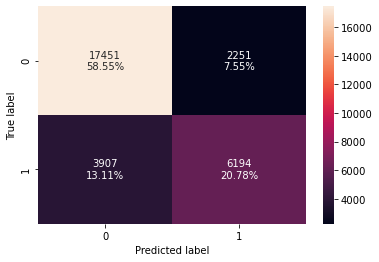

In [71]:
# Check Model perf on training set - creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [72]:
print("Training performance")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)


log_reg_model_train_perf

Training performance


,Accuracy,Recall,Precision,F1
0,0.79,0.61,0.73,0.67


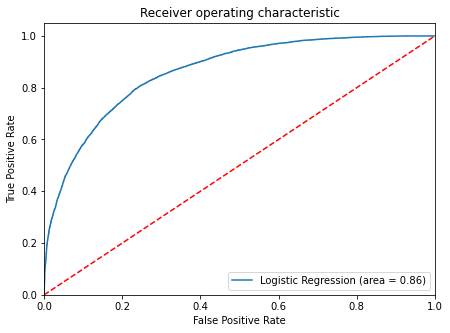

In [73]:
#ROC-AUC
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The score of 0.86 is good
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [74]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.31008339092225223


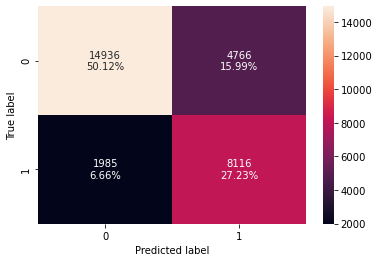

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [76]:
# checking model performance for this model
print("Training performance")
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

log_reg_model_train_perf_threshold_auc_roc

Training performance


,Accuracy,Recall,Precision,F1
0,0.77,0.80,0.63,0.71


* Accuracy has decreased whereas Recall has increased. Decreasing threshold not helping.

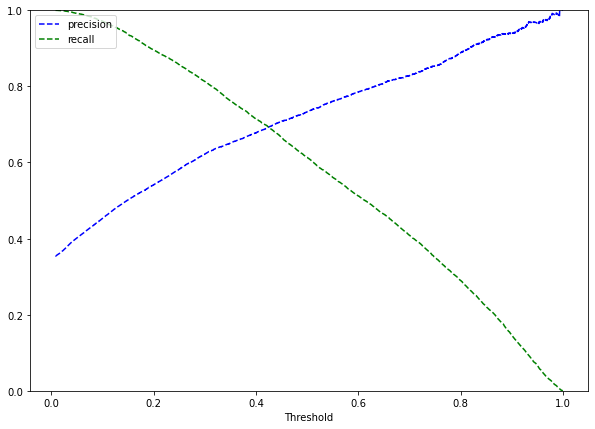

In [77]:
#Let's use Precision-Recall curve and see if we can find a better threshold
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

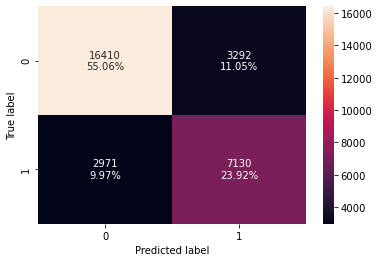

In [78]:
# Around threshold over 0.4 we get balanced precision and recall. let's consider it to be 0.41 and create CF matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=0.41)

In [79]:
print("Training performance")
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=0.41
)

log_reg_model_train_perf_threshold_curve

Training performance


,Accuracy,Recall,Precision,F1
0,0.79,0.71,0.68,0.69


Model performance has slight improvement.

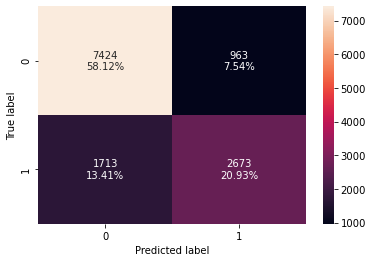

In [80]:
# Check perf on Test set
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [81]:
print("Test performance")
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

log_reg_model_test_perf

Test performance


,Accuracy,Recall,Precision,F1
0,0.79,0.61,0.74,0.67


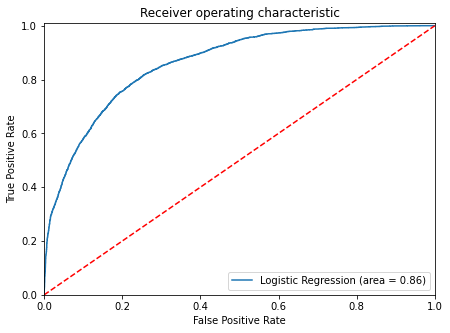

In [82]:
# ROC Curve on Test
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

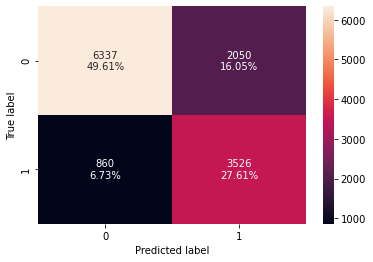

In [83]:
# creating confusion matrix (0.86-0.5 part of curve)
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [84]:
# checking model performance for this model
print("Test performance")
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)

log_reg_model_test_perf_threshold_auc_roc

Test performance


,Accuracy,Recall,Precision,F1
0,0.77,0.80,0.63,0.71


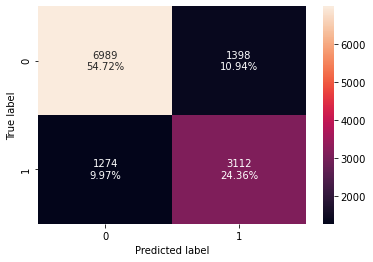

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.41)

In [86]:
print("Test performance")
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=0.41
)

log_reg_model_test_perf_threshold_curve

Test performance


,Accuracy,Recall,Precision,F1
0,0.79,0.71,0.69,0.70


In [87]:
# training performance summary

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison")
models_train_comp_df

Training performance comparison


,Logistic Regression sklearn,Logistic Regression-0.31 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.79,0.77,0.79
Recall,0.61,0.80,0.71
Precision,0.73,0.63,0.68
F1,0.67,0.71,0.69


In [88]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Testing performance comparison")
models_test_comp_df

Testing performance comparison


,Logistic Regression sklearn,Logistic Regression-0.31 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.79,0.77,0.79
Recall,0.61,0.80,0.71
Precision,0.74,0.63,0.69
F1,0.67,0.71,0.70


### Conclusion of Logistic Regression model
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set.


* The model with default threshold the model will give a low recall but good precision score 
* The model with a 0.31 threshold the model will give a high recall but low precision score 
* The model with a 0.41 threshold the model will give a balance recall and precision score 


## Decision Tree

In [89]:
X = ReservData.drop(["booking_status"], axis=1)
Y = ReservData["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [90]:
##  Function to calculate recall score
def get_metrics(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    accuracy = accuracy_score(target, prediction)
    recall = recall_score(target, prediction) 
    precision = precision_score(target, prediction) 
    f1 = f1_score(target, prediction)  
    
     # creating a dataframe of metrics
    tree_Perf = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return tree_Perf

In [91]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [92]:
# Buid Decision Tree
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

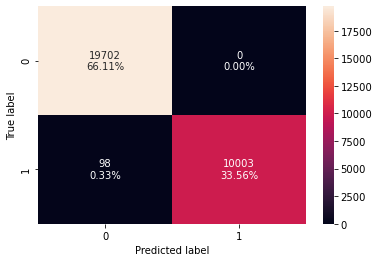

In [93]:
# Check model perf
confusion_matrix_sklearn(model, X_train, y_train)

In [94]:
decision_tree_perf_train =get_metrics(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00,0.99,1.00,1.00


* Model is perofrming well with Precision and Accuracy as perfect on Training set

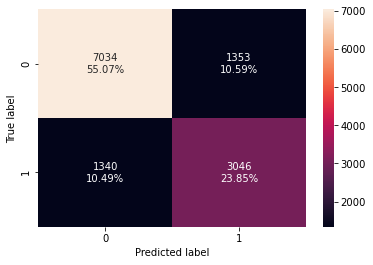

In [95]:
# Check perf on test set
confusion_matrix_sklearn(model, X_test, y_test)

In [96]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.79,0.69,0.69,0.69


* The tree is overfitting and not performing well on test set, so need to prune

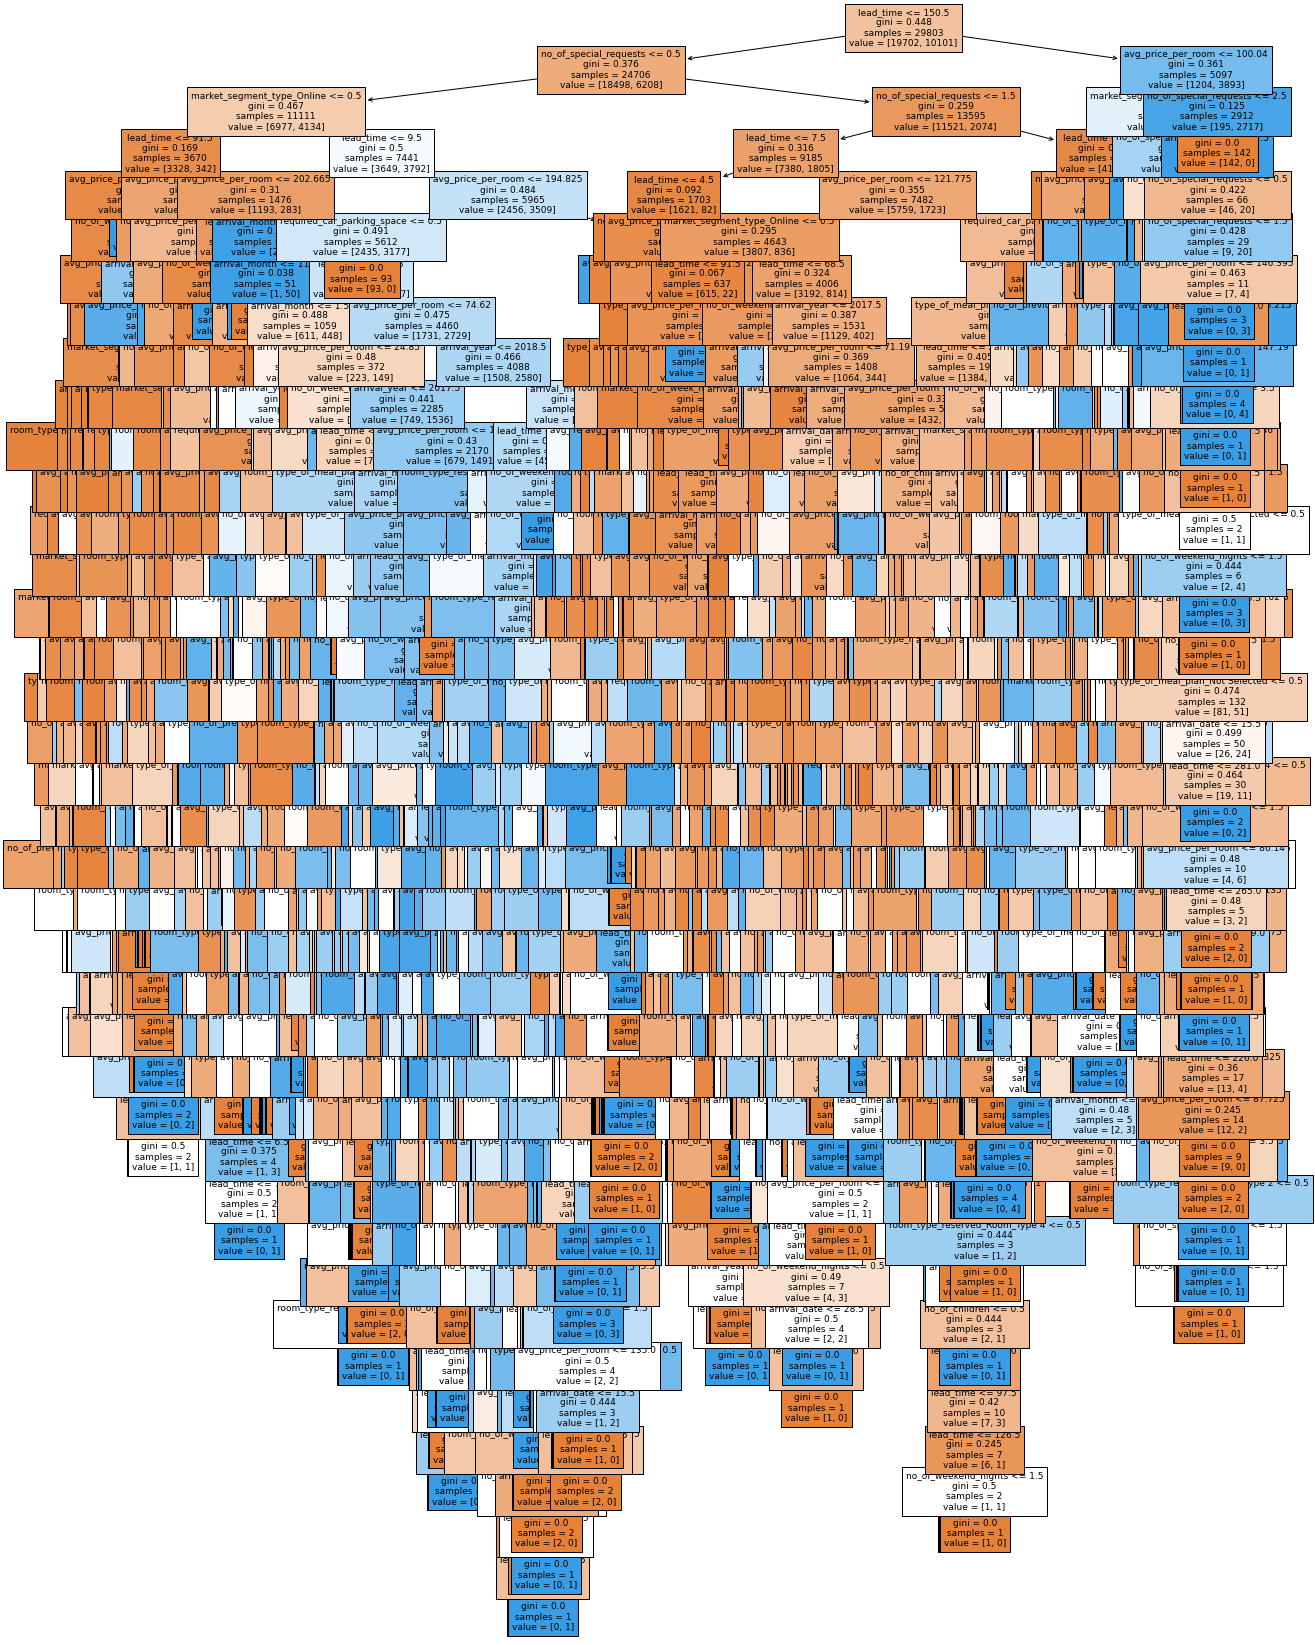

In [97]:
## creating a list of column names
feature_names = X_train.columns.to_list()
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [98]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
lead_time                            0.34
avg_price_per_room                   0.16
no_of_special_requests               0.10
arrival_date                         0.09
market_segment_type_Online           0.08
arrival_month                        0.06
no_of_week_nights                    0.05
no_of_weekend_nights                 0.03
no_of_adults                         0.02
arrival_year                         0.02
type_of_meal_plan_Not Selected       0.01
room_type_reserved_Room_Type 4       0.01
required_car_parking_space           0.01
no_of_children                       0.01
type_of_meal_plan_Meal Plan 2        0.00
room_type_reserved_Room_Type 5       0.00
room_type_reserved_Room_Type 2       0.00
room_type_reserved_Room_Type 6       0.00
market_segment_type_Offline          0.00
market_segment_type_Corporate        0.00
repeated_guest                       0.00
no_of_previous_bookings_not_canceled 0.00
room_type_reserved_Room_Type 7    

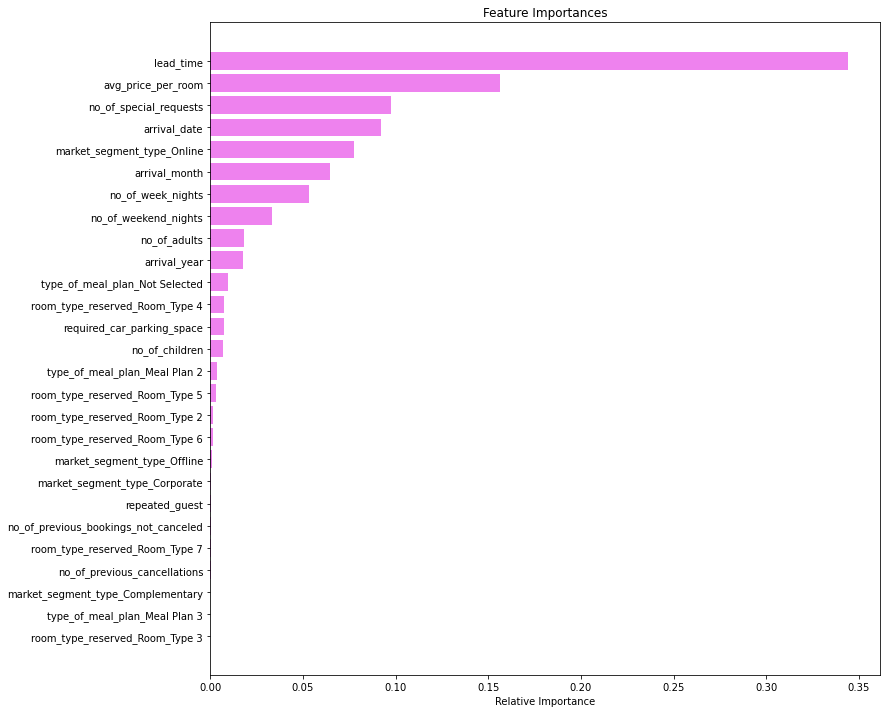

In [99]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [100]:
###Reducing over fitting
###Using GridSearch for Hyperparameter tuning of our tree model
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.0001,
                       random_state=1)

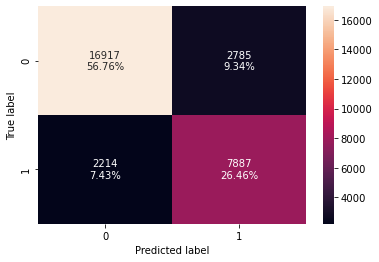

In [101]:
#Perf on Training set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [102]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83,0.78,0.74,0.76


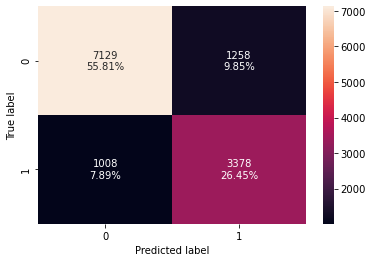

In [103]:
#Perf on testing set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [104]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.82,0.77,0.73,0.75


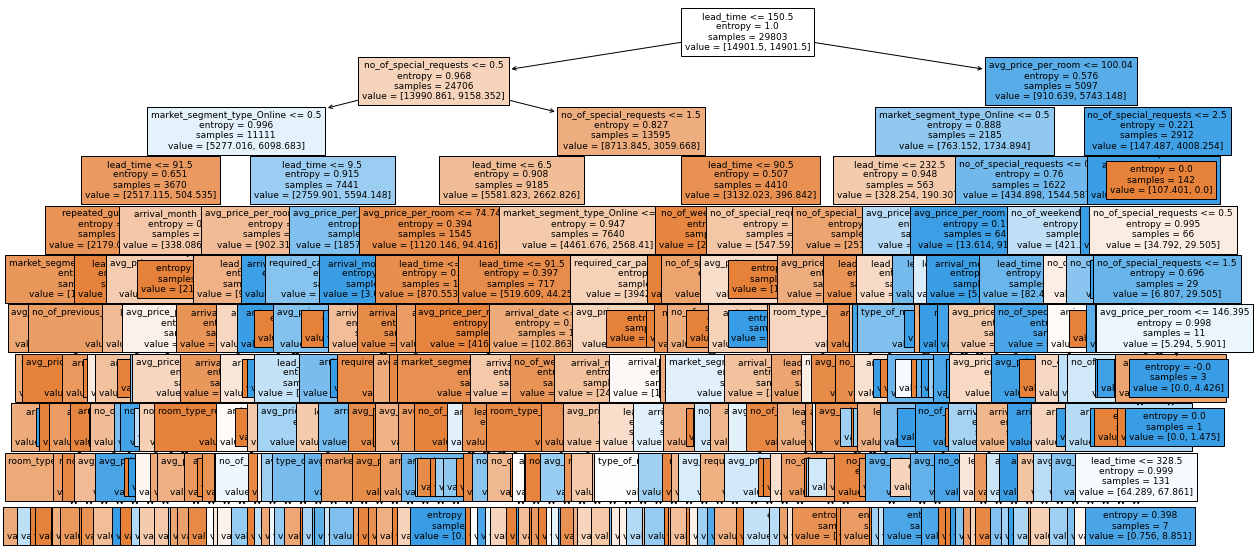

In [105]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
lead_time                            0.39
no_of_special_requests               0.21
market_segment_type_Online           0.15
avg_price_per_room                   0.11
arrival_month                        0.05
no_of_week_nights                    0.02
required_car_parking_space           0.02
no_of_weekend_nights                 0.02
arrival_year                         0.01
arrival_date                         0.01
market_segment_type_Offline          0.00
repeated_guest                       0.00
no_of_adults                         0.00
market_segment_type_Corporate        0.00
room_type_reserved_Room_Type 4       0.00
type_of_meal_plan_Not Selected       0.00
type_of_meal_plan_Meal Plan 2        0.00
no_of_children                       0.00
no_of_previous_bookings_not_canceled 0.00
room_type_reserved_Room_Type 7       0.00
room_type_reserved_Room_Type 2       0.00
room_type_reserved_Room_Type 3       0.00
room_type_reserved_Room_Type 5    

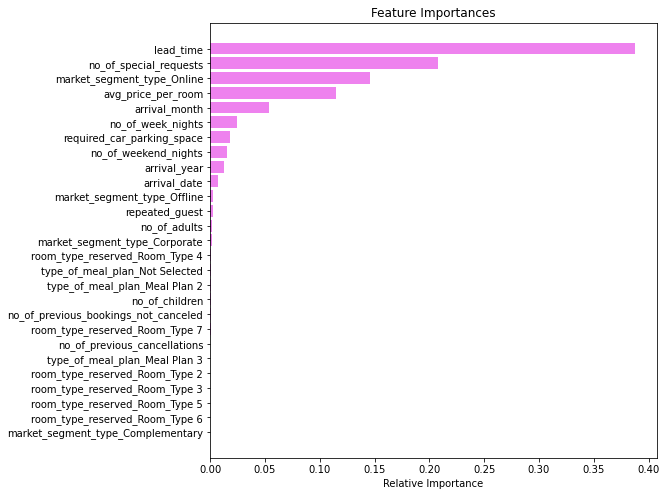

In [107]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Summary from Decision Tree
* Obvisouly tree has become simpler and it is legible
* Performance has improved.
* Important features as per graph are Lead time, No. of Special Requests, Market Segment Type Online, Average Price per room, arrival month.


### Cost Complexity Pruning
The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [108]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities # since geting negative 0 values

In [109]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,0.00
1,-0.00,0.00
2,-0.00,0.00
3,0.00,0.00
4,0.00,0.00
...,...,...
2638,0.01,0.34
2639,0.01,0.34
2640,0.01,0.36
2641,0.03,0.42


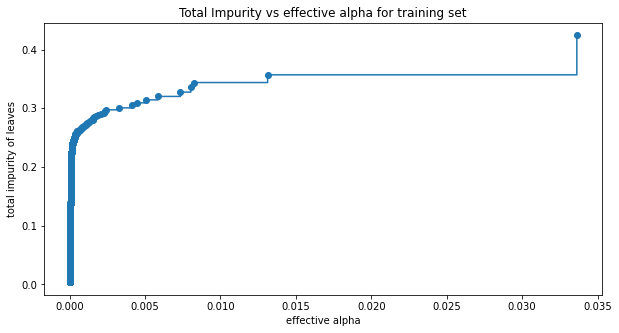

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [111]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07580716995468034


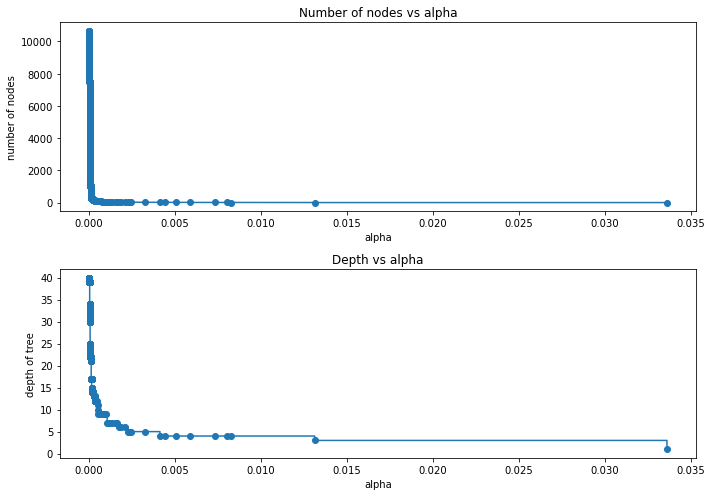

In [112]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [113]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [114]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

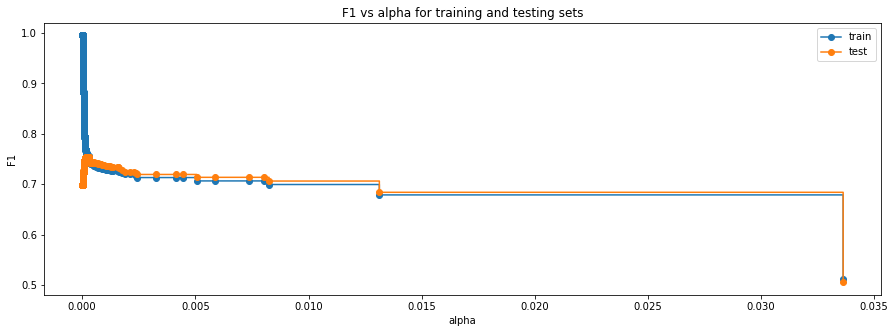

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00027772296209452405,
                       class_weight='balanced', random_state=1)


In [117]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00027772296209452405,
                       class_weight='balanced', random_state=1)

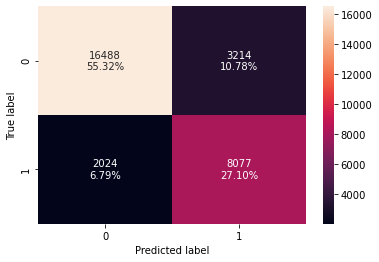

In [118]:
# checking performance on training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [119]:
decision_tree_post_perf_train =get_metrics(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.82,0.80,0.72,0.76


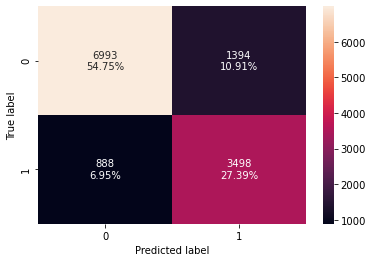

In [120]:
# Checking performance on test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [121]:
decision_tree_post_test = get_metrics(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.82,0.80,0.72,0.75


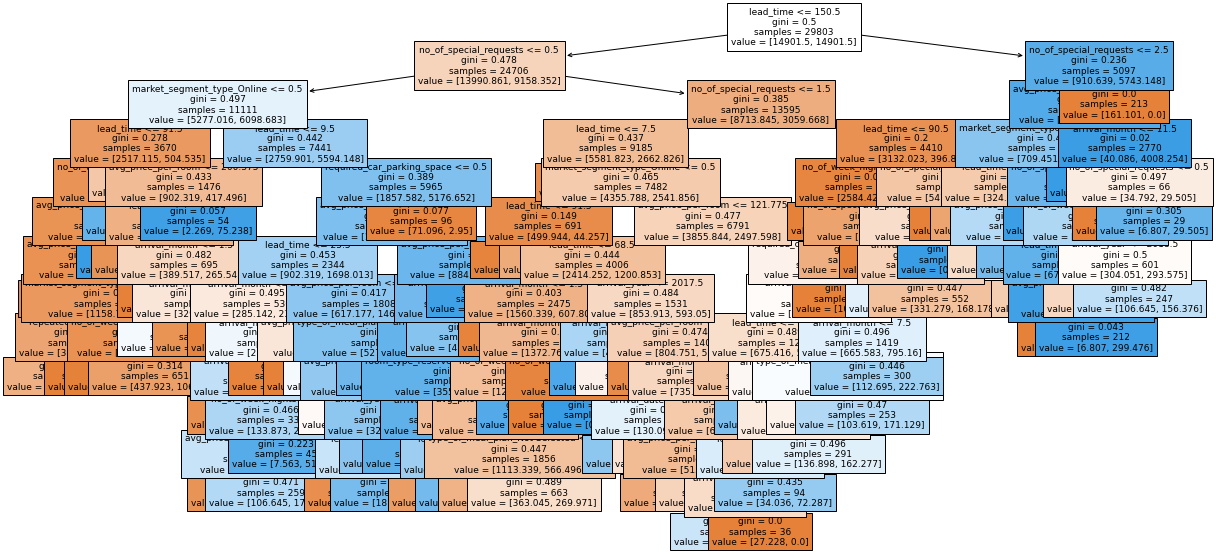

In [122]:
# Visualize tree after post pruning (cost - complexity)
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [123]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
lead_time                            0.43
no_of_special_requests               0.20
market_segment_type_Online           0.18
avg_price_per_room                   0.08
arrival_month                        0.04
required_car_parking_space           0.02
arrival_year                         0.01
no_of_weekend_nights                 0.01
no_of_week_nights                    0.01
type_of_meal_plan_Not Selected       0.00
repeated_guest                       0.00
arrival_date                         0.00
room_type_reserved_Room_Type 5       0.00
market_segment_type_Offline          0.00
room_type_reserved_Room_Type 4       0.00
market_segment_type_Corporate        0.00
market_segment_type_Complementary    0.00
room_type_reserved_Room_Type 7       0.00
room_type_reserved_Room_Type 6       0.00
type_of_meal_plan_Meal Plan 3        0.00
room_type_reserved_Room_Type 3       0.00
room_type_reserved_Room_Type 2       0.00
type_of_meal_plan_Meal Plan 2     

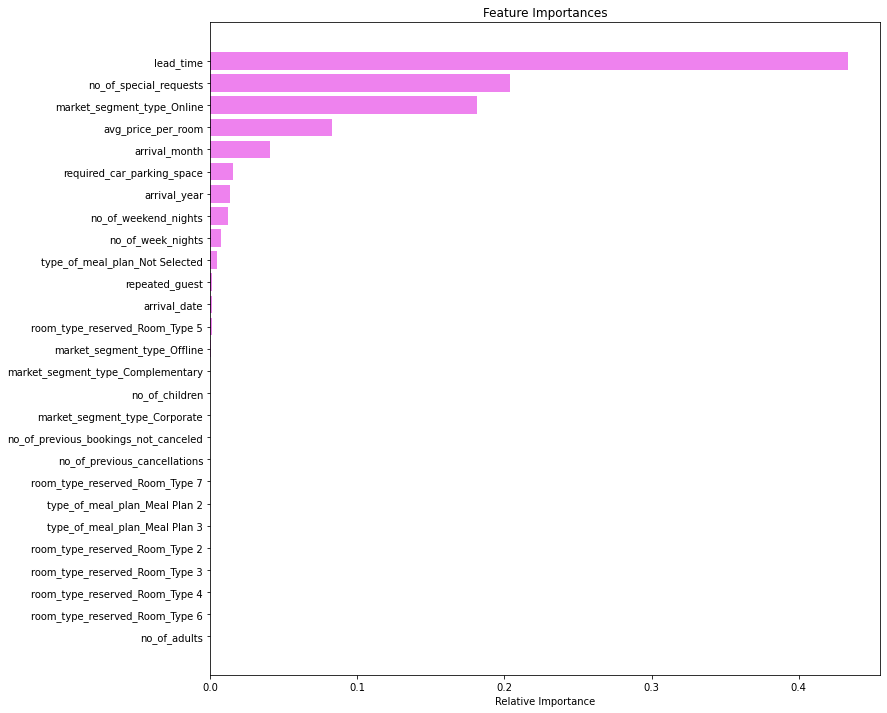

In [124]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Tree has become simpler but little complex than pre pruning model

In [125]:
# training performance comparison

print("Training performance comparison")
df_train_performance = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
df_train_performance.columns = [
    "Tree - Default",
    "Tree - Pre_Prune",
    "Tree - Post_Prune",
]

df_train_performance

Training performance comparison


,Tree - Default,Tree - Pre_Prune,Tree - Post_Prune
Accuracy,1.00,0.83,0.82
Recall,0.99,0.78,0.80
Precision,1.00,0.74,0.72
F1,1.00,0.76,0.76


In [126]:
# testing performance comparison
print("Test performance comparison")
df_test_performance = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ], 
    axis=1,
)
df_test_performance.columns = [
    "Tree - Default",
    "Tree - Pre_Prune",
    "Tree - Post_Prune",
]


df_test_performance

Test performance comparison


,Tree - Default,Tree - Pre_Prune,Tree - Post_Prune
Accuracy,0.79,0.82,0.82
Recall,0.69,0.77,0.80
Precision,0.69,0.73,0.72
F1,0.69,0.75,0.75


## Summary
* After post pruning we can see that it has given better Recall, Precision and F1 Score
* Key variables remain almost same as pre prune.
* Decision Tree model performs better
* Key variables are Lead Time, No of Special Requests, Market Segement Type and Average price per room.

## Recommendations
* No of special requests and lead time are pivotal parameters in cancellations.
* Bookings made in less than 150 days prior to arrival has less chances compared to booking made more than 150 days before.
* Any special requests are made, Hotel should have to be more cautious on those reservations
* Also, Holiday months like Christmas, Thanksgiving months have less cancellation, where as summer holidays see more cancellations so Hotel mght run some campagins during that period
* Hotel also might charge cancellation fee for More lead time or special request reservations